In [1]:
cd ..

m:\OneDrive\Projects\federated_imputation_pc2


# Test SciencePlot Library

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import pandas as pd
import seaborn as sns

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

import os

# Check we are in examples dir
current_dir = os.getcwd().lower()
if (current_dir.endswith('scienceplots')):
    os.chdir('./examples')
# Create 'figures' folder if it does not exist
if (not os.path.exists('./figures')):
    os.makedirs('figures')

def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))

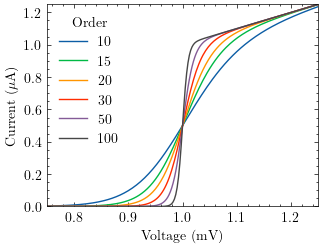

In [5]:
pparam = dict(xlabel='Voltage (mV)', ylabel=r'Current ($\mu$A)')

x = np.linspace(0.75, 1.25, 201)

with plt.style.context(['science']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    #fig.savefig('figures/fig01.jpg', dpi=300)
    #plt.close()
    plt.show()

# Line Charts Comparison Different Scenarios

In [17]:
# plot params
def draw_linechart(data, x_values, x_label, metrics, output_name, legend = True):
    ms = 3
    with plt.style.context(['science', 'ieee', 'grid']):
        fig, axes = plt.subplots(1, 2, figsize=(6, 2))
        # RMSE
        axes[0].plot(x_values, data[data['method'] == 'central'][metrics[0]], label='central', marker='o', markersize=ms)
        axes[0].plot(x_values, data[data['method'] == 'local'][metrics[0]], label='local', marker='o', markersize=ms)
        axes[0].plot(x_values, data[data['method'] == 'simpleavg'][metrics[0]], label='simpleavg', marker='o', markersize=ms)
        axes[0].plot(x_values, data[data['method'] == 'fedmechw_new'][metrics[0]], label='ours', marker='o', markersize=ms)
        axes[0].set_xlabel(x_label)
        axes[0].set_xticks(x_values)
        axes[0].set_ylabel(metrics[0].upper())
        
        # AUROC
        axes[1].plot(x_values, data[data['method'] == 'central'][metrics[1]], label='central', marker='o', markersize=ms)
        axes[1].plot(x_values, data[data['method'] == 'local'][metrics[1]], label='local', marker='o', markersize=ms)
        axes[1].plot(x_values, data[data['method'] == 'simpleavg'][metrics[1]], label='simpleavg', marker='o', markersize=ms)
        axes[1].plot(x_values, data[data['method'] == 'fedmechw_new'][metrics[1]], label='ours', marker='o', markersize=ms)
        axes[1].set_xlabel(x_label)
        axes[1].set_xticks(x_values)
        axes[1].set_ylabel(metrics[1].upper())
        if legend:
            plt.legend(bbox_to_anchor=(1.1, 0.5))
        plt.tight_layout()
        fig.savefig(f'figures/{output_name}.png', dpi=300)
        #plt.close()
        plt.show()

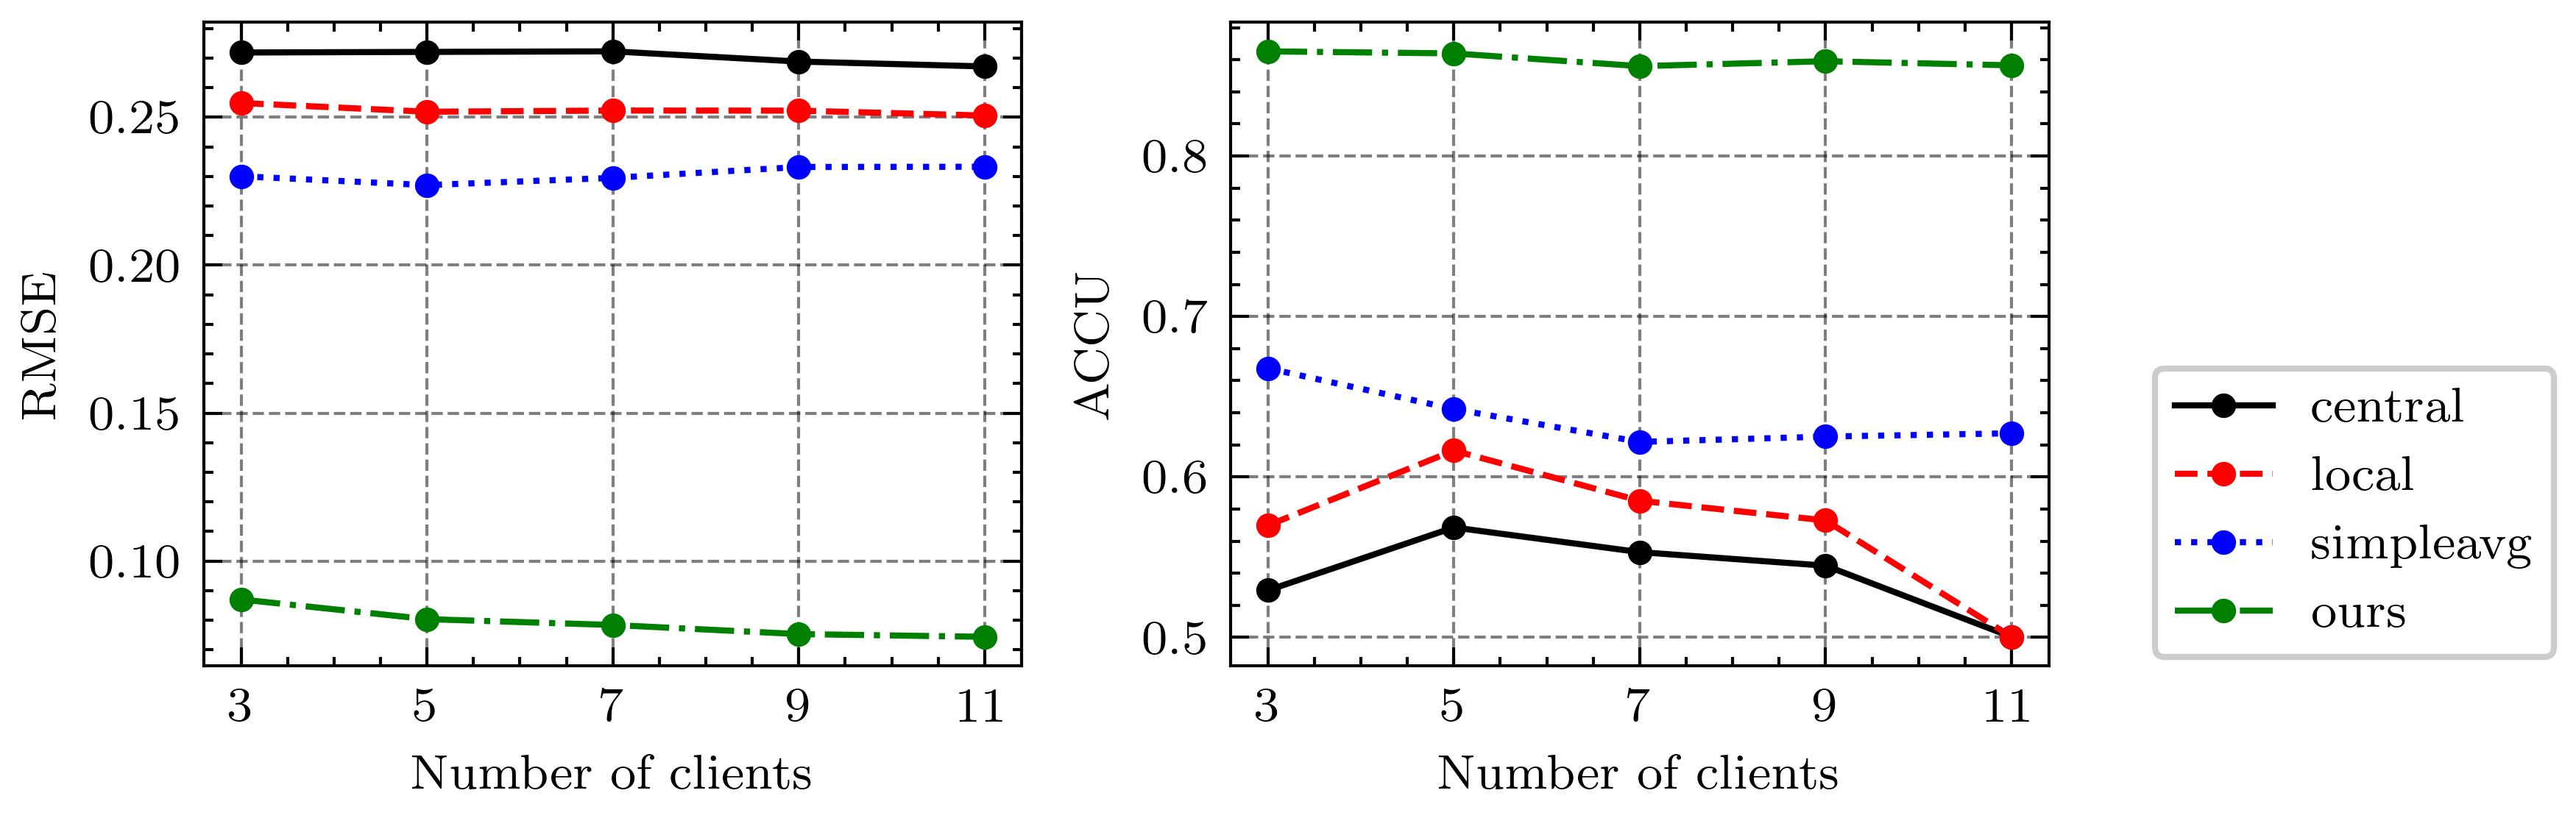

In [18]:
# scenario 1 - N = 1,3,5,7,9,11 vs Prediction AUROC | vs Imputation RMSE
plt.rcParams.update({'figure.dpi': '100'})
root = "M:\\OneDrive\\Projects\\federated_imputation_pc2\\results\\processed_results\\fed_imp_pc2\\0802\\codon\\result.xlsx"
data = pd.read_excel(root, sheet_name="exp1-lr", header=0)
data = data[['n_clients', 'method', 'rmse', 'ws', 'accu', 'f1', 'roc']]

n_clients = [3, 5, 7, 9, 11]
method = ['central', 'local', 'simpleavg', 'fedmechw_new']
data = data[data['n_clients'].isin(n_clients)]
data = data[data['method'].isin(method)]
draw_linechart(data, x_values = n_clients, x_label = 'Number of clients', metrics = ['rmse', 'accu'], output_name = 'line_s1')

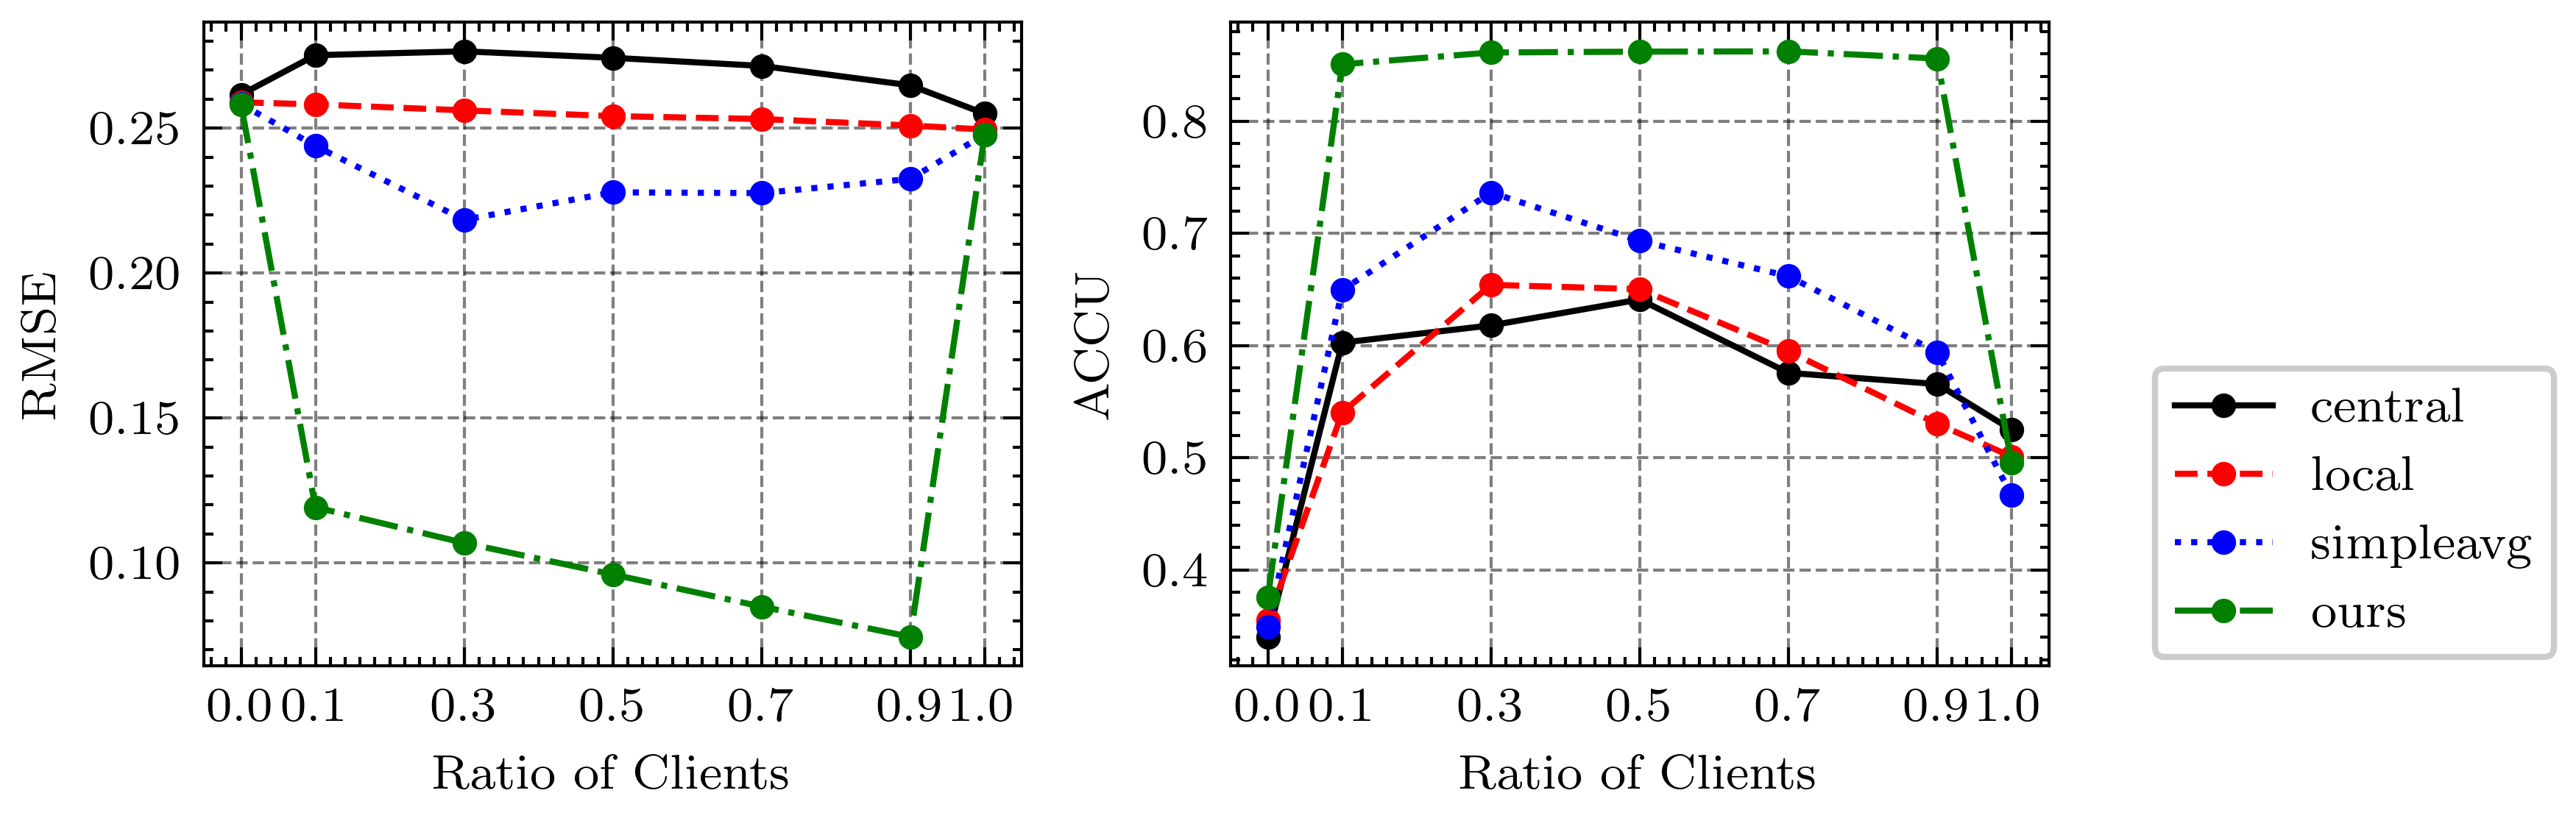

In [19]:
# scenario 2 - r = 0,0.1,0.3,0.5,0.7,0.9,1.0 vs Prediction AUROC | vs Imputation RMSE
plt.rcParams.update({'figure.dpi': '100'})
root = "M:\\OneDrive\\Projects\\federated_imputation_pc2\\results\\processed_results\\fed_imp_pc2\\0802\\codon\\result.xlsx"
data = pd.read_excel(root, sheet_name="exp2", header=0)
data = data[['mechanism', 'method', 'rmse', 'ws', 'accu', 'f1', 'roc']]

mechanism = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
method = ['central', 'local', 'simpleavg', 'fedmechw_new']
data = data[data['mechanism'].isin(mechanism)]
data = data[data['method'].isin(method)]
draw_linechart(data, x_values = mechanism, x_label = 'Ratio of Clients', metrics = ['rmse', 'accu'], output_name = 'line_s2')

# TSNE Plot

In [125]:
# pick 1 dataset pick 1 scenario 4 methods pick 2 clients - tsne plot -  

# fetch all request data
plt.rcParams.update({'figure.dpi': '100'})
root = "M:\OneDrive\\Projects\\federated_imputation_pc2\\results\\raw_results\\fed_imp_pc2\\0802\\codon\\11\\sample-evenly\\mnar_lr@sp=extremer1\\fixed@mr=0.5"
methods = ['central', 'local', 'fedavg-s', 'fedmechw_new']
data_dict = {}

for method in methods:
    origin_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\origin_data_0.npy')
    imputed_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\imputed_data_0.npy')
    split_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\split_indices_0.npy')
    data_dict[method] = (origin_data, imputed_data, split_data)

In [160]:
from sklearn.manifold import TSNE
import gower

plt.rcParams.update({'figure.dpi': '100'})
root = "M:\OneDrive\\Projects\\federated_imputation_pc2\\results\\raw_results\\fed_imp_pc2\\0802\\codon\\11\\sample-evenly\\mnar_lr@sp=extremer1\\fixed@mr=0.5"
methods = ['central', 'local', 'fedavg-s', 'fedmechw_new']
data_dict = {}

for method in methods:
    origin_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\origin_data_0.npy')
    imputed_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\imputed_data_0.npy')
    split_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\split_indices_0.npy')
    data_dict[method] = (origin_data, imputed_data, split_data)

# tsne plot for one client
client_indices = [0, 10]
methods = ['central', 'local', 'fedavg-s', 'fedmechw_new']
method_name = ['Central', 'Local', 'SAvg', 'Ours']

######################################################################################
# tsne computing
tsne_results_dict = {}
colors_result = {}
for method in methods:
    
    origin_data = data_dict[method][0]
    imputed_data = data_dict[method][1]
    split_indices = data_dict[method][2]
    if split_indices.size == 0:
        split_indices = data_dict['local'][2]
    origin_datas = np.split(origin_data, split_indices, axis=0)
    imputed_datas = np.split(imputed_data, split_indices, axis=0)

    for client_index in client_indices:
        # data for one client
        origin_data = origin_datas[client_index]
        imputed_data = imputed_datas[client_index]
        plot_data = np.concatenate((origin_data, imputed_data), axis = 0)
        
        # Parameters
        N1 = origin_data.shape[0]
        N2 = imputed_data.shape[0]
        colors = ["red" for i in range(N1)] +  ["blue" for i in range(N2)]    

        # TSNE anlaysis
        tsne = TSNE(metric='precomputed', n_components = 2, verbose = 0, n_iter= 1000, perplexity = 40, n_iter_without_progress = 300, init = 'random')
        tsne_results = tsne.fit_transform(np.clip(gower.gower_matrix(plot_data), 0, 1))
        print('Ploting TSNE for client {} with method {} ...'.format(client_index, method))
        tsne_results_dict[(client_index, method)] = tsne_results
        colors_result[(client_index, method)] = colors

Ploting TSNE for client 0 with method central ...
Ploting TSNE for client 10 with method central ...
Ploting TSNE for client 0 with method local ...
Ploting TSNE for client 10 with method local ...
Ploting TSNE for client 0 with method fedavg-s ...
Ploting TSNE for client 10 with method fedavg-s ...
Ploting TSNE for client 0 with method fedmechw_new ...
Ploting TSNE for client 10 with method fedmechw_new ...


In [179]:
def tsne_plot(tsne_results_dict, colors_result, output_name, methods, client_indices, method_name):
    
    with plt.style.context(['science', 'ieee', 'scatter']):

        fig, axes = plt.subplots(2, 4, figsize=(8, 3))

        for col_idx, method in enumerate(methods):
            
            for row_idx, client_index in enumerate(client_indices):
                
                tsne_results = tsne_results_dict[(client_index, method)]
                colors = colors_result[(client_index, method)]

                # Plotting
                axes[row_idx, col_idx].scatter(tsne_results[:N1,0], tsne_results[:N1,1], c = colors[:N1], alpha = 0.3, label = "Original")
                axes[row_idx, col_idx].scatter(tsne_results[N1:,0], tsne_results[N1:,1], c = colors[N1:], alpha = 0.3, label = "Imputed")
                #axes[row_idx, col_idx].set_title(f'{method_name[col_idx]}')
                # axes[row_idx, col_idx].set_xticklabels([])
                # axes[row_idx, col_idx].set_yticklabels([])
        
        for i in range(4):
            axes[0, i].set_title(f'{method_name[i]}')
        
        for j in range(2):
            axes[j, 0].set_ylabel(f'Client {client_indices[j]}')
        
        plt.subplots_adjust(hspace=0)
        plt.subplots_adjust(wspace=0)
        plt.legend(bbox_to_anchor=(1.0, 0.5))
        fig.savefig(f'figures/{output_name}.png', dpi=300)
        plt.show()
        
output_name = 'tsne_plot_s1_11'
methods = ['central', 'local', 'fedavg-s', 'fedmechw_new']
client_indices = [0, 10]
method_name = ['Central', 'Local', 'SAvg', 'Ours']
tsne_plot(tsne_results_dict, colors_result, output_name, methods, client_indices, method_name)

In [178]:
from sklearn.manifold import TSNE
import gower

plt.rcParams.update({'figure.dpi': '100'})
ratio = 0.5
root = f"M:\OneDrive\\Projects\\federated_imputation_pc2\\results\\raw_results\\fed_imp_pc2\\0802\\codon\\10\\sample-evenly\\mnar_lr@sp=extreme_r={ratio}\\fixed@mr=0.5"
methods = ['central', 'local', 'fedavg-s', 'fedmechw_new']
data_dict = {}

for method in methods:
    origin_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\origin_data_0.npy')
    imputed_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\imputed_data_0.npy')
    split_data = np.load(root + f'\\as_{method}@s_102931466@s_50@p_False\\split_indices_0.npy')
    data_dict[method] = (origin_data, imputed_data, split_data)

# tsne plot for one client
client_indices = [0, 9]
methods = ['central', 'local', 'fedavg-s', 'fedmechw_new']
method_name = ['Central', 'Local', 'SAvg', 'Ours']

######################################################################################
# tsne computing
tsne_results_dict = {}
colors_result = {}
for method in methods:
    
    origin_data = data_dict[method][0]
    imputed_data = data_dict[method][1]
    split_indices = data_dict[method][2]
    if split_indices.size == 0:
        split_indices = data_dict['local'][2]
    origin_datas = np.split(origin_data, split_indices, axis=0)
    imputed_datas = np.split(imputed_data, split_indices, axis=0)

    for client_index in client_indices:
        # data for one client
        origin_data = origin_datas[client_index]
        imputed_data = imputed_datas[client_index]
        plot_data = np.concatenate((origin_data, imputed_data), axis = 0)
        
        # Parameters
        N1 = origin_data.shape[0]
        N2 = imputed_data.shape[0]
        colors = ["red" for i in range(N1)] +  ["blue" for i in range(N2)]    

        # TSNE anlaysis
        tsne = TSNE(metric='precomputed', n_components = 2, verbose = 0, n_iter= 1000, perplexity = 40, n_iter_without_progress = 300, init = 'random')
        tsne_results = tsne.fit_transform(np.clip(gower.gower_matrix(plot_data), 0, 1))
        print('Ploting TSNE for client {} with method {} ...'.format(client_index, method))
        tsne_results_dict[(client_index, method)] = tsne_results
        colors_result[(client_index, method)] = colors

Ploting TSNE for client 0 with method central ...
Ploting TSNE for client 9 with method central ...
Ploting TSNE for client 0 with method local ...
Ploting TSNE for client 9 with method local ...
Ploting TSNE for client 0 with method fedavg-s ...
Ploting TSNE for client 9 with method fedavg-s ...
Ploting TSNE for client 0 with method fedmechw_new ...
Ploting TSNE for client 9 with method fedmechw_new ...


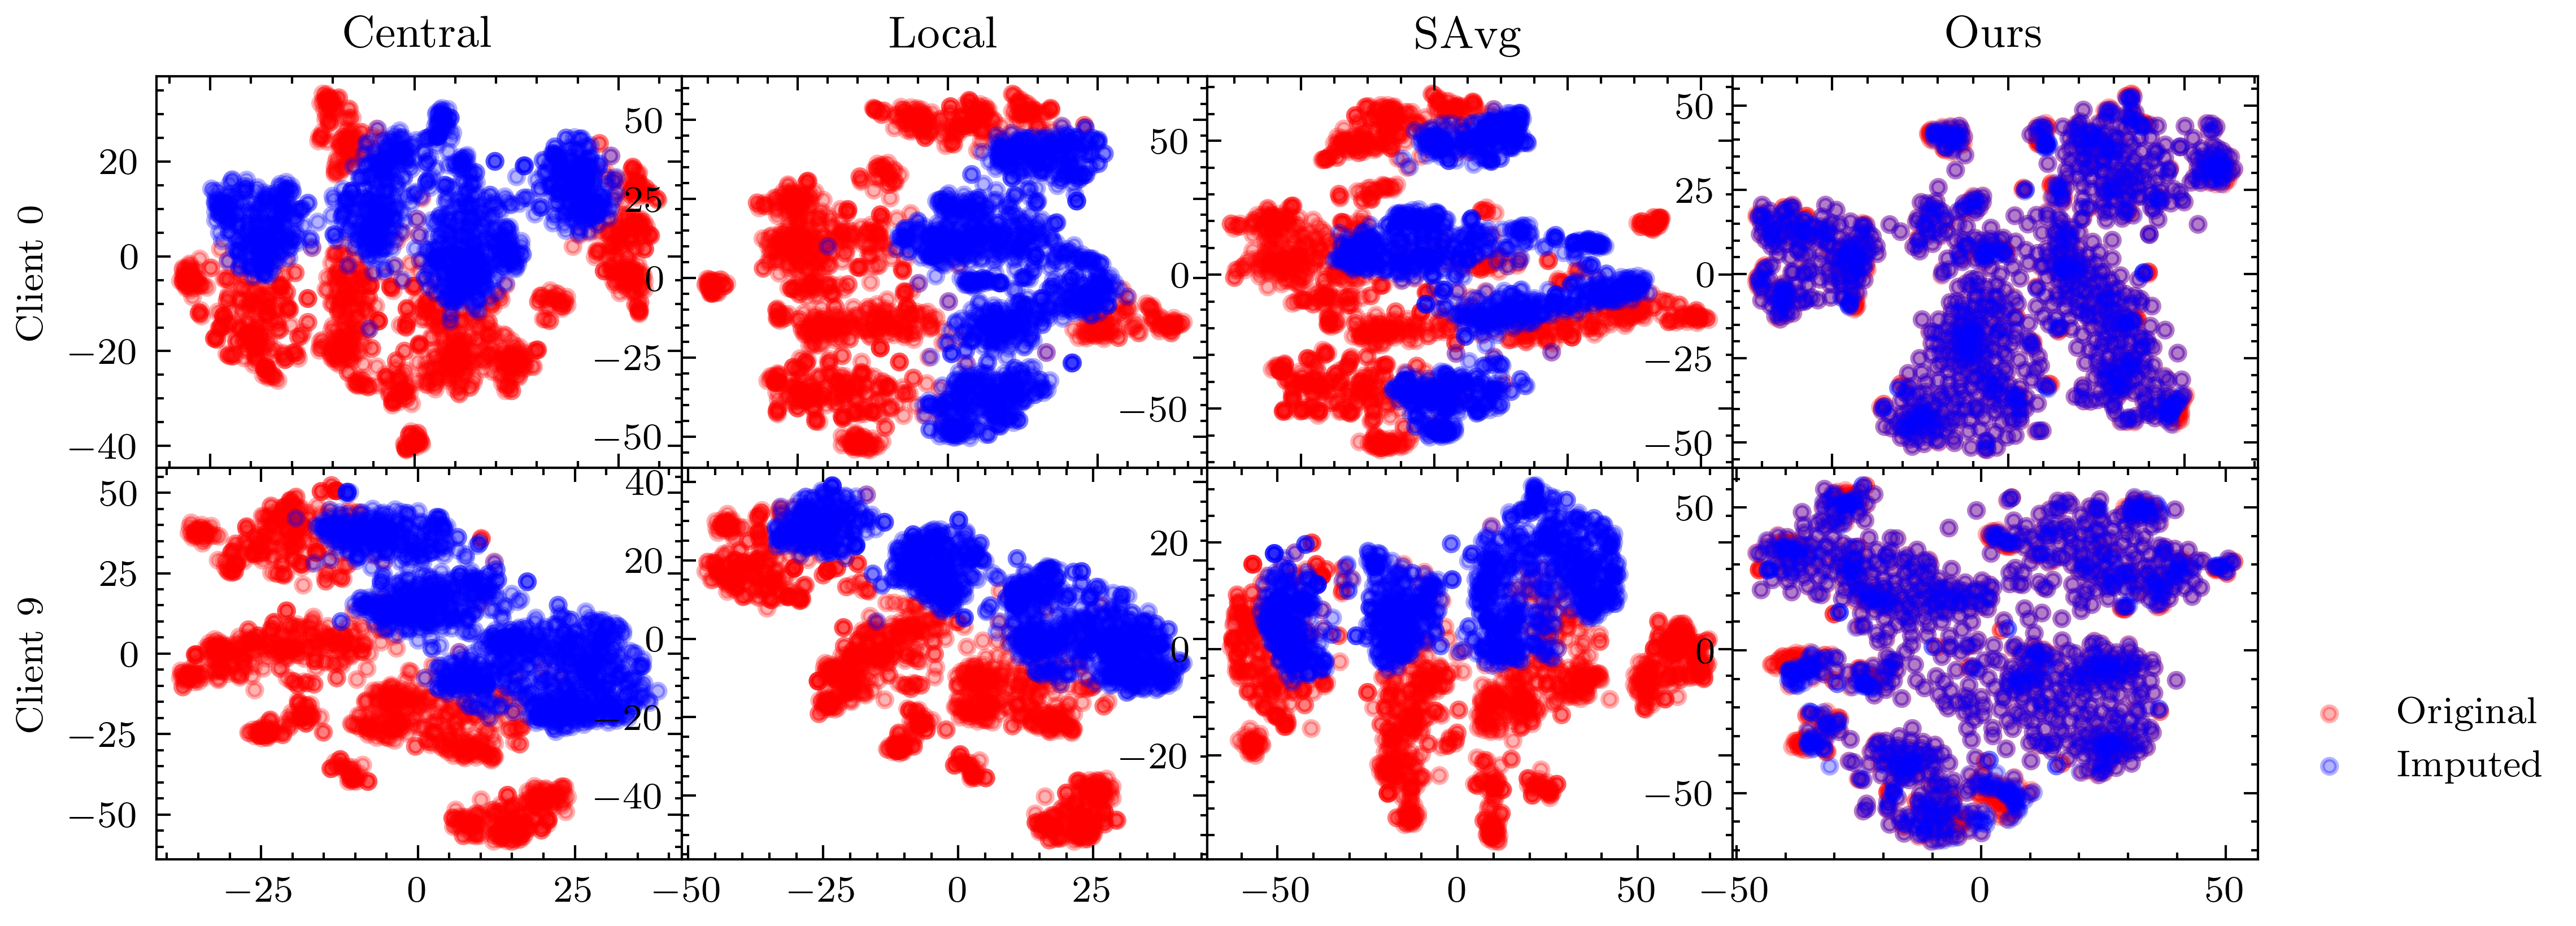

In [180]:
output_name = 'tsne_plot_s2_0.5'
methods = ['central', 'local', 'fedavg-s', 'fedmechw_new']
client_indices = [0, 9]
method_name = ['Central', 'Local', 'SAvg', 'Ours']
tsne_plot(tsne_results_dict, colors_result, output_name, methods, client_indices, method_name)

# Heatmap

In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def vis_local_model_sim(tracker, iteration, model = 'local', metric = 'cos'):
    n_cols = 5
    n_rows = 4
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2.5))

    for feature_idx in range(n_rows * n_cols):
        clients_records = [item for item in tracker.records if item.iteration == iteration and item.feature_idx == feature_idx]
        if model == 'local':
            X = clients_records[0].local_imp_model_params
        elif model == 'mm':
            X = clients_records[0].local_mm_model_params
        # tsne = TSNE(n_components=2, verbose=0, perplexity=4, n_iter=500)
        # decomp_results = tsne.fit_transform(X)
        ax = axes[feature_idx // n_cols, feature_idx % n_cols]
        if metric == 'cos':
            cosine_sim = 1 - (cosine_similarity(X) + 1)/2
            sns.heatmap(cosine_sim, annot=False, cmap="crest", ax = ax, vmin = 0, vmax =1)
        elif metric == 'l2':
            cosine_sim = euclidean_distances(X)
            sns.heatmap(cosine_sim, annot=False, cmap="crest", ax = ax)
        else:
            raise NotImplementedError
        ax.title.set_text("feature {}".format(feature_idx))
    
    fig.suptitle("{}".format(model))
    plt.tight_layout()
    plt.show()

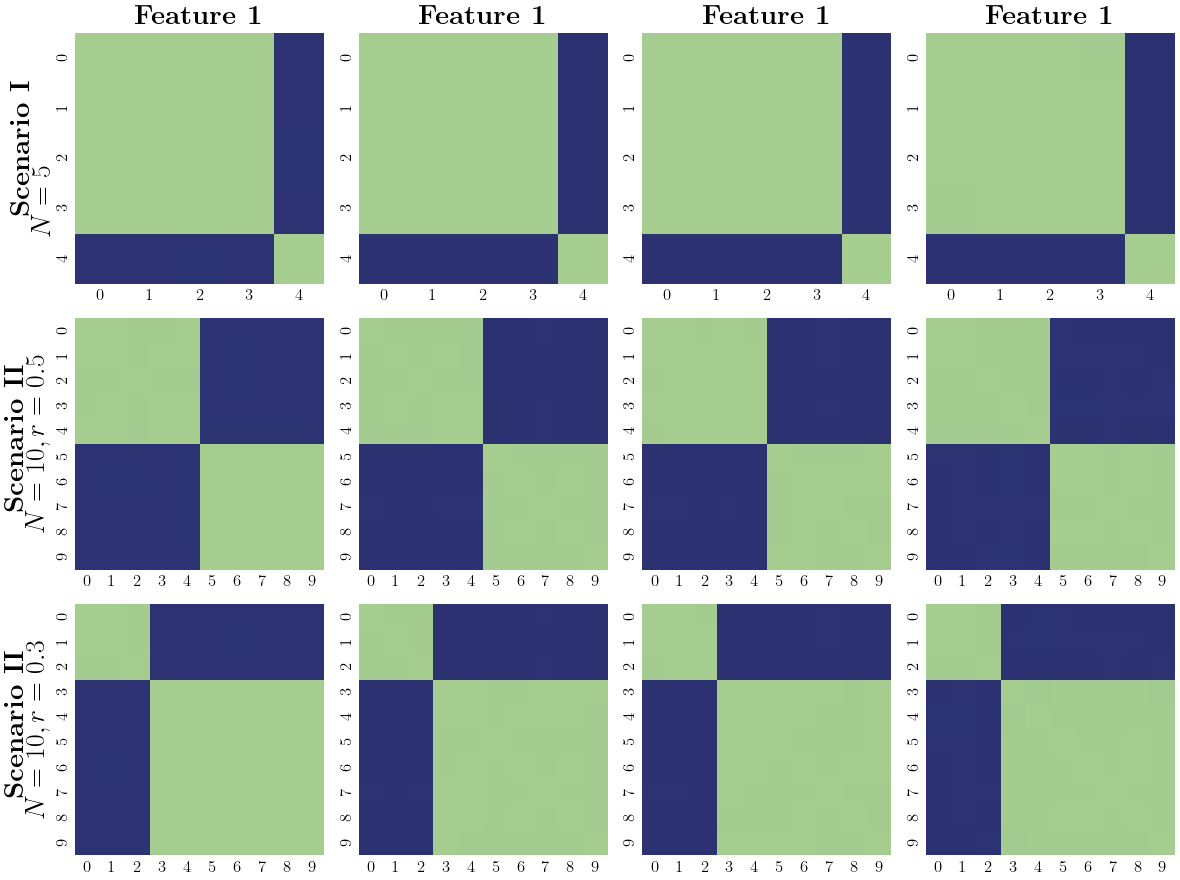

In [91]:
# settings
root = "M:\OneDrive\\Projects\\federated_imputation_pc2\\results\\raw_results\\fed_imp_pc2\\0802\\codon"

settings = [
    root + "\\5\\sample-evenly\\mnar_lr@sp=extremer1\\fixed@mr=0.5\\as_fedmechw_new@s_102931466@s_50@p_False\\mm_coef_0.npy",
    root + "\\10\\sample-evenly\\mnar_lr@sp=extreme_r=0.5\\fixed@mr=0.5\\as_fedmechw_new@s_102931466@s_50@p_False\\mm_coef_0.npy",
    root + "\\10\\sample-evenly\\mnar_lr@sp=extreme_r=0.3\\fixed@mr=0.5\\as_fedmechw_new@s_102931466@s_50@p_False\\mm_coef_0.npy",
]


settings_name = [
    r"\textbf{Scenario I} \\ $N = 5$",
    r"\textbf{Scenario II} \\ $N = 10, r = 0.5$",
    r"\textbf{Scenario II} \\ $N = 10, r = 0.3$"
]
with plt.style.context(['science', 'grid']):
    features = [1, 3, 5, 7]
    fig, axes = plt.subplots(3, 4, figsize=(4 * 3, 3 * 3))

    for row_idx, setting in enumerate(settings):
        for col_idx, feature in enumerate(features):
            mm_coefs = np.load(setting)
            cosine_sim = 1 - (cosine_similarity(mm_coefs[feature]) + 1)/2
            sns.heatmap(cosine_sim, annot=False, cmap="crest", ax = axes[row_idx, col_idx], vmin = 0, vmax =1, cbar = False)
            
            if row_idx == 0:
                axes[row_idx, col_idx].set_title(r"\textbf{Feature 1}", fontsize = 20, fontweight = 'black')
                
            if col_idx == 0:
                axes[row_idx, col_idx].set_ylabel(settings_name[row_idx], fontsize =20, fontweight = 'black')
                
            axes[row_idx, col_idx].tick_params(axis=u'both', which=u'both',length=0, labelsize=12)

    plt.tight_layout()
    fig.savefig(f'figures/heatmap.png', dpi=600)
    plt.show()